In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
import warnings
warnings.simplefilter(action='ignore')

In [70]:
data = pd.read_csv("flatness_data", index_col=0).merge(pd.read_csv("mpid_prop")[["prop", "mpid"]].replace({0:"Non-superconducting", 1:"Superconducting"}), left_index=True, right_on="mpid")
# Remove one corrupted file
data = data[data["mpid"]!="mp-541692"]

In [3]:
min_flat = re.compile("min_flatness.*")
min_bandwidth = re.compile("min_bandwidth.*")
relative_flat = re.compile("relative_flatness.*")
relative_bandwidth = re.compile("relative_bandwidth.*")
mean_flat = re.compile("mean_flatness.*")
mean_bandwidth = re.compile("mean_bandwidth.*")
sd_flat = re.compile("sd_flatness.*")
sd_bandwidth = re.compile("sd_bandwidth.*")
range_flat = re.compile("range_flatness.*")
range_bandwidth = re.compile("range_bandwidth.*")
system_flat = re.compile("system_flatness.*")
system_bandwidth = re.compile("system_bandwidth.*")

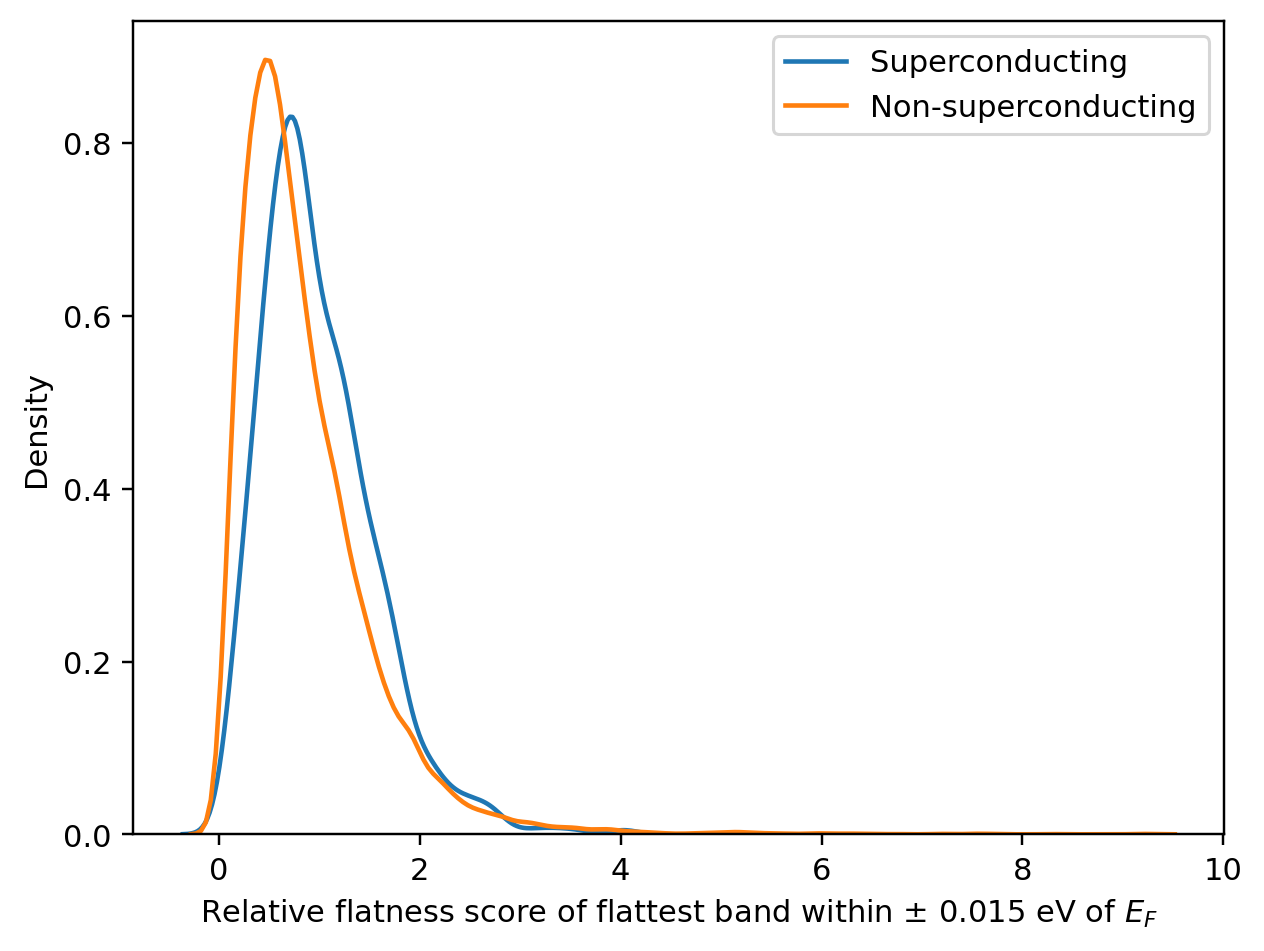

In [37]:
min_relative = re.compile("min_relative_.*15_ev")
min_relative_data = data[["mpid", "prop"] + [col for col in data.columns if min_relative.match(col)]]

plt.figure(dpi=220)
sns.kdeplot(min_relative_data[min_relative_data["prop"]=="Superconducting"], x="min_relative_flatness_0.015_ev", label="Superconducting");
sns.kdeplot(min_relative_data[min_relative_data["prop"]=="Non-superconducting"], x="min_relative_flatness_0.015_ev", label="Non-superconducting");
plt.xlabel(r"Relative flatness score of flattest band within $\pm$ 0.015 eV of $E_F$")
plt.legend();

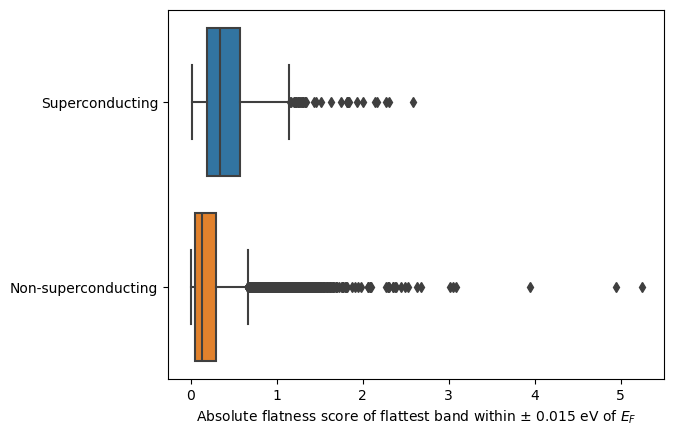

In [71]:
sns.boxplot(data, x="min_flatness_0.015_ev", y="prop")
plt.xlabel(r"Absolute flatness score of flattest band within $\pm$ 0.015 eV of $E_F$")
plt.ylabel("");

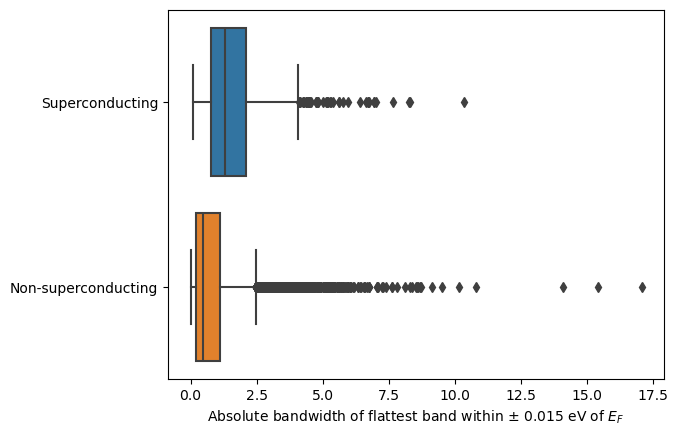

In [78]:
sns.boxplot(data, x="min_bandwidth_0.015_ev", y="prop")
plt.xlabel(r"Absolute bandwidth of flattest band within $\pm$ 0.015 eV of $E_F$")
plt.ylabel("");

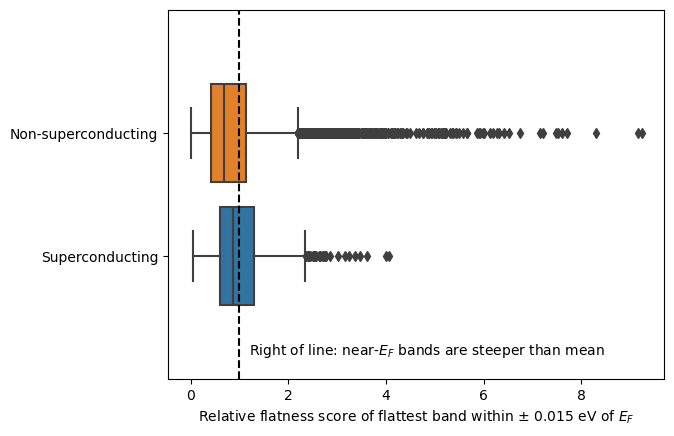

In [72]:
sns.boxplot(min_relative_data, x="min_relative_flatness_0.015_ev", y="prop")
plt.plot([1, 1], [-1, 2], "k--")
plt.ylim(-1, 2)
plt.annotate(r"Right of line: near-$E_F$ bands are steeper than mean", (1.2, -0.8))
plt.xlabel(r"Relative flatness score of flattest band within $\pm$ 0.015 eV of $E_F$")
plt.ylabel("");

In [69]:
data[data["sd_flatness_0.015_ev"]>1000]

,min_flatness_0.015_ev,min_relative_flatness_0.015_ev,mean_flatness_0.015_ev,mean_relative_flatness_0.015_ev,sd_flatness_0.015_ev,sd_relative_flatness_0.015_ev,range_flatness_0.015_ev,range_relative_flatness_0.015_ev,system_flatness_0.015_ev,min_bandwidth_0.015_ev,...,min_relative_bandwidth_0.5_ev,mean_bandwidth_0.5_ev,mean_relative_bandwidth_0.5_ev,sd_bandwidth_0.5_ev,sd_relative_bandwidth_0.5_ev,range_bandwidth_0.5_ev,range_relative_bandwidth_0.5_ev,system_bandwidth_0.5_ev,prop,mpid
150342,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,...,1.132125e+00,6.119862e+00,1.297578,7.803381e-01,0.165453,1.560676e+00,0.330906,0.0,Superconducting,mp-1391
5933,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,...,1.948195e+00,2.538184e+00,1.948195,0.000000e+00,0.000000,0.000000e+00,0.000000,0.0,Non-superconducting,mp-998153
36420,0.121575,2.987466e-17,3.901717e+12,0.000959,1.294053e+13,0.00318,4.682060e+13,0.011505,1.0,1.259096,...,2.610428e-17,5.605427e+12,0.000116,5.549089e+13,0.001150,5.549372e+14,0.011505,1.0,Non-superconducting,mp-541692
24665,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,...,7.250713e-01,1.229099e+01,0.889036,1.619986e+00,0.117177,3.687738e+00,0.266743,0.0,Non-superconducting,mp-53
23729,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,...,1.061908e+00,5.703808e+00,1.061908,0.000000e+00,0.000000,0.000000e+00,0.000000,0.0,Non-superconducting,mp-24289


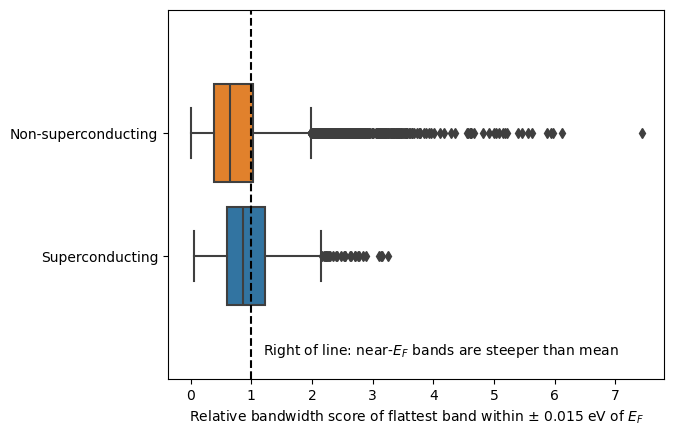

In [77]:
sns.boxplot(min_relative_data, x="min_relative_bandwidth_0.015_ev", y="prop")
plt.plot([1, 1], [-1, 2], "k--")
plt.ylim(-1, 2)
plt.annotate(r"Right of line: near-$E_F$ bands are steeper than mean", (1.2, -0.8))
plt.xlabel(r"Relative bandwidth score of flattest band within $\pm$ 0.015 eV of $E_F$")
plt.ylabel("");

In [76]:
data["prop"].value_counts()/len(data)

Non-superconducting    0.936116
Superconducting        0.063884
Name: prop, dtype: float64

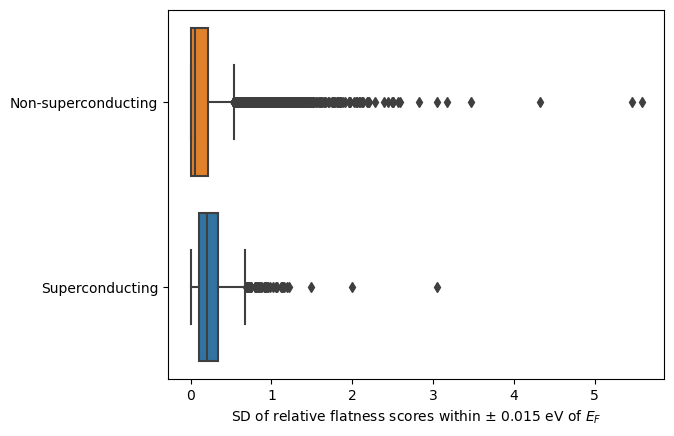

In [83]:
sns.boxplot(data, x="sd_relative_flatness_0.015_ev", y="prop", \
            order=["Non-superconducting", "Superconducting"], palette={"Non-superconducting":"tab:orange", "Superconducting":"tab:blue"})
plt.xlabel(r"SD of relative flatness scores within $\pm$ 0.015 eV of $E_F$")
plt.ylabel("");

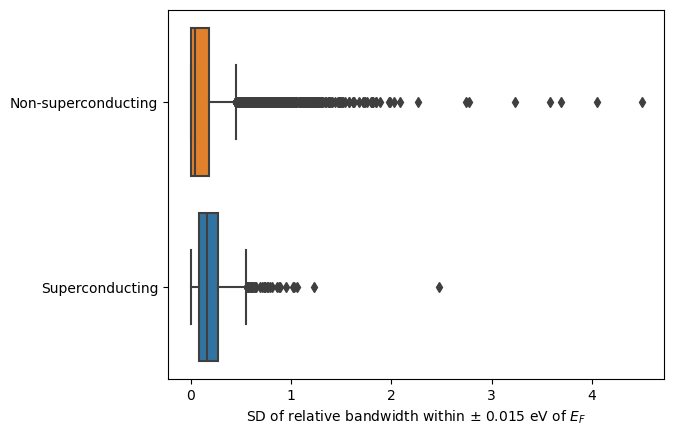

In [84]:
sns.boxplot(data, x="sd_relative_bandwidth_0.015_ev", y="prop", \
            order=["Non-superconducting", "Superconducting"], palette={"Non-superconducting":"tab:orange", "Superconducting":"tab:blue"})
plt.xlabel(r"SD of relative bandwidth within $\pm$ 0.015 eV of $E_F$")
plt.ylabel("");

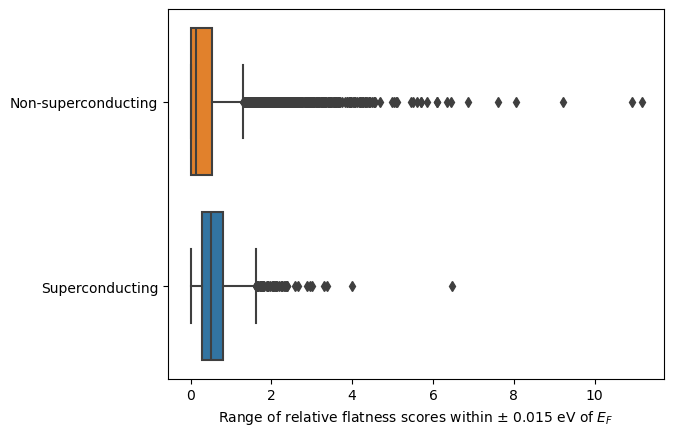

In [85]:
sns.boxplot(data, x="range_relative_flatness_0.015_ev", y="prop", \
            order=["Non-superconducting", "Superconducting"], palette={"Non-superconducting":"tab:orange", "Superconducting":"tab:blue"})
plt.xlabel(r"Range of relative flatness scores within $\pm$ 0.015 eV of $E_F$")
plt.ylabel("");

In [95]:
system_data = data[~np.any(np.isinf(data.drop(columns=["mpid", "prop"])), axis=1)]


system_data[["prop", "system_flatness_0.015_ev"]].groupby("prop").mean().rename(columns={"system_flatness_0.015_ev":"Proportion of structures with flat-steep system"})

,Proportion of structures with flat-steep system
prop,
Non-superconducting,0.035964
Superconducting,0.032365


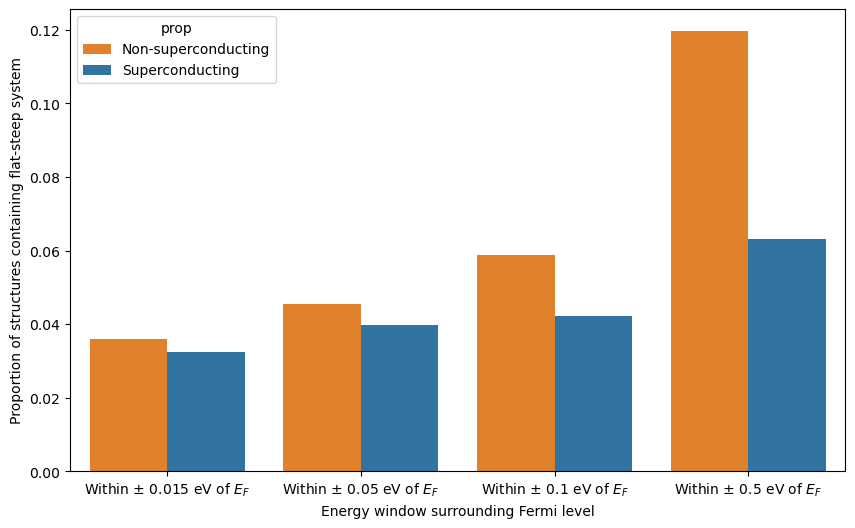

In [125]:
pat = re.compile(r"system_flatness.*")
system_data = data[~np.any(np.isinf(data.drop(columns=["mpid", "prop"])), axis=1)]
system_data = system_data[["prop"] + [col for col in data.columns if pat.match(col)]]

plot_data = system_data.groupby("prop").mean().reset_index().melt("prop")
plot_data["variable"] = r"Within $\pm$ " + plot_data["variable"].str.extract(r"(0\.\d+)_ev")[0] + r" eV of $E_F$"

plt.figure(figsize=(10, 6))
ax = sns.barplot(plot_data, x="variable", y="value", hue="prop", palette={"Non-superconducting":"tab:orange", "Superconducting":"tab:blue"})
plt.xlabel("Energy window surrounding Fermi level")
plt.ylabel("Proportion of structures containing flat-steep system");

In [131]:
Y_train

,min_relative_flatness_0.015_ev,sd_relative_flatness_0.015_ev
105915,0.326609,0.000000
46472,0.072906,0.372489
146257,0.721966,0.280019
75900,0.122406,0.013043
109445,0.251835,0.000000
...,...,...
73194,0.300907,0.000000
66293,1.354993,0.622466
77796,1.077410,0.024267
121366,1.438729,0.100756


In [144]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

X = data[~np.any(np.isinf(data.drop(columns=["mpid", "prop"])), axis=1)&~(np.any(data.isna(), axis=1))][["prop", "min_relative_flatness_0.015_ev", "sd_relative_flatness_0.015_ev"]]
X = X.replace({"Superconducting":1, "Non-superconducting":0})
X_train, X_test, Y_train, Y_test = train_test_split(X.iloc[:, 1:], X[["prop"]], test_size=0.2)

model = LogisticRegression()
model.fit(X_train, Y_train)

print(classification_report(Y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      3682
           1       0.00      0.00      0.00       224

    accuracy                           0.94      3906
   macro avg       0.47      0.50      0.49      3906
weighted avg       0.89      0.94      0.91      3906



In [145]:
np.sum(model.predict(X_test))

0

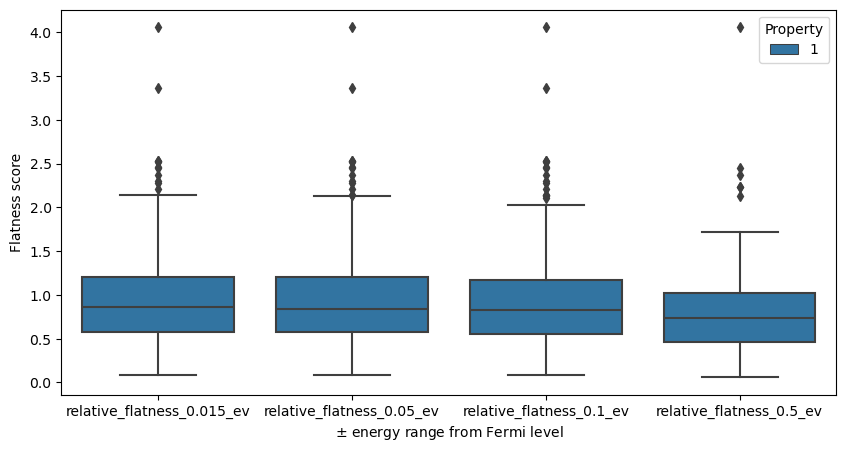

In [16]:

relative_flatness = data[["prop"] + [col for col in data.columns if relative_flat.match(col)]]

plt.figure(figsize=(10, 5))
sns.boxplot(relative_flatness.melt(["prop"]), x="variable", y="value", hue="prop")
plt.xlabel(r"$\pm$ energy range from Fermi level")
plt.ylabel("Flatness score")
plt.legend(title="Property", bbox_to_anchor=(1, 1));